In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

def getSubjectivity(review):
  return TextBlob(review).sentiment.subjectivity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity
def analyze(score):
  if score <0 :
    return 'Negative'
  elif score == 0 :
    return 'Neutral'
  else :
    return 'Positive'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('lemmatized_datasetbaru.csv',engine='python')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       30194 non-null  int64 
 1   username                         30193 non-null  object
 2   tweet                            30188 non-null  object
 3   cleaned_tweets                   30188 non-null  object
 4   Token,Stopwords, and POS tagged  30194 non-null  object
 5   Lemma                            30194 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
final_data = pd.DataFrame(df[['username','Lemma']])
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30194 entries, 0 to 30193
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  30193 non-null  object
 1   Lemma     30194 non-null  object
dtypes: object(2)
memory usage: 471.9+ KB


In [ ]:
final_data['Subjectivity'] = final_data['Lemma'].apply(getSubjectivity)
final_data['Polarity'] = final_data['Lemma'].apply(getPolarity)
final_data['Textblob'] = final_data['Polarity'].apply(analyze)
final_data.head()

,username,Lemma,Subjectivity,Polarity,Textblob
0,btc_price_,price change h,0.0,0.0,Neutral
1,leduchb1401,bitcoin declaration independence,0.0,0.0,Neutral
2,Fred_CryptoCold,fix,0.0,0.0,Neutral
3,MNblockchain,country treasury dedicate bitcoin reserve se...,0.0,0.0,Neutral
4,BitcoinFeesCash,updated bitcoin transaction fee bch next blo...,0.0,0.0,Neutral


In [ ]:
tb_counts = final_data.Textblob.value_counts()
tb_counts

Neutral     13007
Positive    12283
Negative     4904
Name: Textblob, dtype: int64

In [ ]:
final_data = final_data.drop(final_data[final_data.Textblob == 'Neutral'].index)

In [ ]:
final_data.head(10)

,username,Lemma,Subjectivity,Polarity,Textblob
6,sentinel727,fkd around find didnt ya really havent liste...,0.400000,0.066667,Positive
7,Piereluis1234,nice tent nice crack dose steal bitcoin acco...,0.666667,0.400000,Positive
9,LieutSerge,u r describe like month ago sell btc survive...,0.688889,-0.208333,Negative
10,L0RDGIV,hope bitcoin ethereum arent successful netwo...,0.587302,0.354762,Positive
12,L0RDGIV,strongly support network make minimal sacrif...,0.666667,0.166667,Positive
13,Marlborman888,today day fly kk continue bullish day day ti...,0.950000,0.800000,Positive
14,CardanoAlonzo,bitcoin market tiny today billion drop bucke...,0.300000,-0.100000,Negative
15,MithMithte,post originally publish bitcoin news,0.750000,0.375000,Positive
18,HoldYourColors,platform bring gamers esports celebrity toge...,0.300000,1.000000,Positive
19,E_TrippleStaX,bitcoin might hurt continue bleed due time b...,0.277083,0.077083,Positive


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17187 entries, 6 to 30193
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   username      17187 non-null  object 
 1   Lemma         17187 non-null  object 
 2   Subjectivity  17187 non-null  float64
 3   Polarity      17187 non-null  float64
 4   Textblob      17187 non-null  object 
dtypes: float64(2), object(3)
memory usage: 805.6+ KB


In [ ]:
label = []
for index, row in final_data.iterrows():
  if row['Textblob'] == 'Positive':
    label.append(1)
  else:
    label.append(0)
final_data['label'] = label
final_data.tail()

,username,Lemma,Subjectivity,Polarity,Textblob,label
30186,JVWVU1,dont understand people dca bitcoin look year...,0.066667,-0.166667,Negative,0
30187,PatatasSmall,nobody accepts bitcoin buy thing bitcoin deb...,0.150000,0.100000,Positive,1
30189,AryanJabbari,well put really hopeful central african regi...,0.397143,0.097143,Positive,1
30191,bradsuddath,old man yell,0.200000,0.100000,Positive,1
30193,mobile_appz,american independence look like secure bitco...,0.300000,0.200000,Positive,1


In [ ]:
final_data.head(10)

,username,Lemma,Subjectivity,Polarity,Textblob,label
6,sentinel727,fkd around find didnt ya really havent liste...,0.400000,0.066667,Positive,1
7,Piereluis1234,nice tent nice crack dose steal bitcoin acco...,0.666667,0.400000,Positive,1
9,LieutSerge,u r describe like month ago sell btc survive...,0.688889,-0.208333,Negative,0
10,L0RDGIV,hope bitcoin ethereum arent successful netwo...,0.587302,0.354762,Positive,1
12,L0RDGIV,strongly support network make minimal sacrif...,0.666667,0.166667,Positive,1
13,Marlborman888,today day fly kk continue bullish day day ti...,0.950000,0.800000,Positive,1
14,CardanoAlonzo,bitcoin market tiny today billion drop bucke...,0.300000,-0.100000,Negative,0
15,MithMithte,post originally publish bitcoin news,0.750000,0.375000,Positive,1
18,HoldYourColors,platform bring gamers esports celebrity toge...,0.300000,1.000000,Positive,1
19,E_TrippleStaX,bitcoin might hurt continue bleed due time b...,0.277083,0.077083,Positive,1


In [ ]:
tb_counts = final_data.Textblob.value_counts()
tb_counts

Positive    12283
Negative     4904
Name: Textblob, dtype: int64

**WORDCLOUD**

In [ ]:
import wordcloud
import matplotlib.pyplot as plt

**Positive Wordcloud**

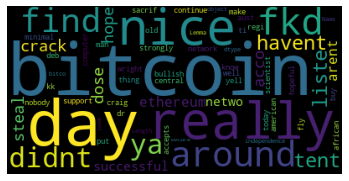

In [ ]:
test1 = final_data.loc[final_data['label'] == 1, 'Lemma']

wordcloud1 = wordcloud.WordCloud().generate(str(test1))

plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

**Negative Wordcloud**

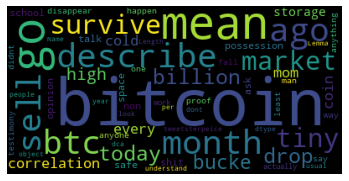

In [ ]:
test2 = final_data.loc[final_data['label'] == 0, 'Lemma']

wordcloud2 = wordcloud.WordCloud().generate(str(test2))

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

**WordCloud**

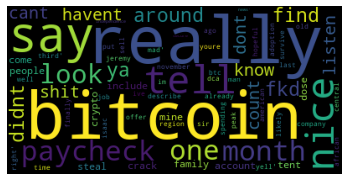

In [ ]:
text = final_data['Lemma'].values 

wordcloud = wordcloud.WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
final_data.head()

,username,Lemma,Subjectivity,Polarity,Textblob,label
6,sentinel727,fkd around find didnt ya really havent liste...,0.400000,0.066667,Positive,1
7,Piereluis1234,nice tent nice crack dose steal bitcoin acco...,0.666667,0.400000,Positive,1
9,LieutSerge,u r describe like month ago sell btc survive...,0.688889,-0.208333,Negative,0
10,L0RDGIV,hope bitcoin ethereum arent successful netwo...,0.587302,0.354762,Positive,1
12,L0RDGIV,strongly support network make minimal sacrif...,0.666667,0.166667,Positive,1


In [ ]:
from google.colab import files


In [ ]:
final_data.to_csv('labelled_datasetbaru.csv')
files.download('labelled_datasetbaru.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>